# Homework 2
##### Solomon Kim

In [0]:
import pandas as pd

def load_insurance_data():
    return pd.read_csv("insurance.csv")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [0]:
insurance = load_insurance_data()

In [7]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Saving figure ./images/insurance_attribute_histogram_plots.png


FileNotFoundError: ignored

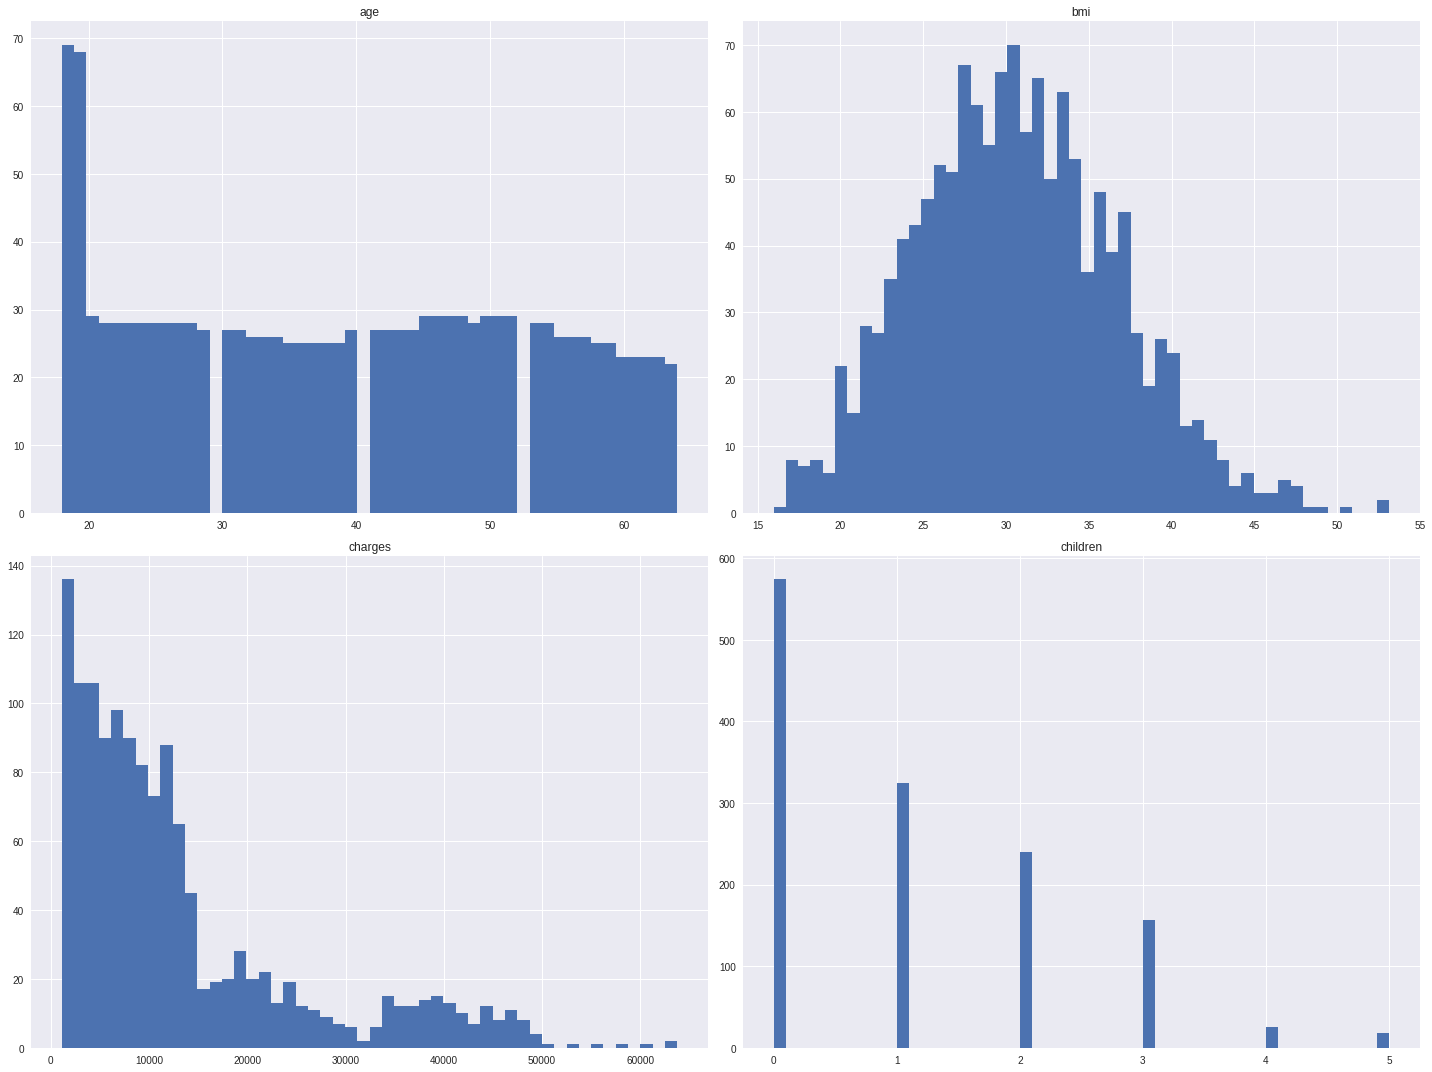

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", path)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
insurance.hist(bins=50, figsize=(20,15))
save_fig("insurance_attribute_histogram_plots")
plt.show()

### The "age" and "changes" histograms show that there is a slight bias to the left of each graph... we can either scale this data or smooth this over to correct for these possible outliers or rounding errors. There is also a nice curve with the bmi graph showing that there might be a correlation or something there. Finally in the children graph there is a decrease as the children get older. 

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(insurance, insurance["smoker"]):
    print('Training samples: {}, testing samples: {}'.format(train_index.shape, test_index.shape))
    
    strat_train_set = insurance.loc[train_index]
    strat_test_set = insurance.loc[test_index]


Training samples: (1070,), testing samples: (268,)


In [13]:
strat_test_set.shape

(268, 7)

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance, test_size=0.2, random_state=42)

In [15]:
test_set['smoker'].value_counts()

no     214
yes     54
Name: smoker, dtype: int64

In [16]:
strat_test_set['smoker'].value_counts()

no     213
yes     55
Name: smoker, dtype: int64

In [0]:
corr_matrix = insurance.corr()

In [18]:
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

Saving figure ./images/scatter_matrix_plot.png


FileNotFoundError: ignored

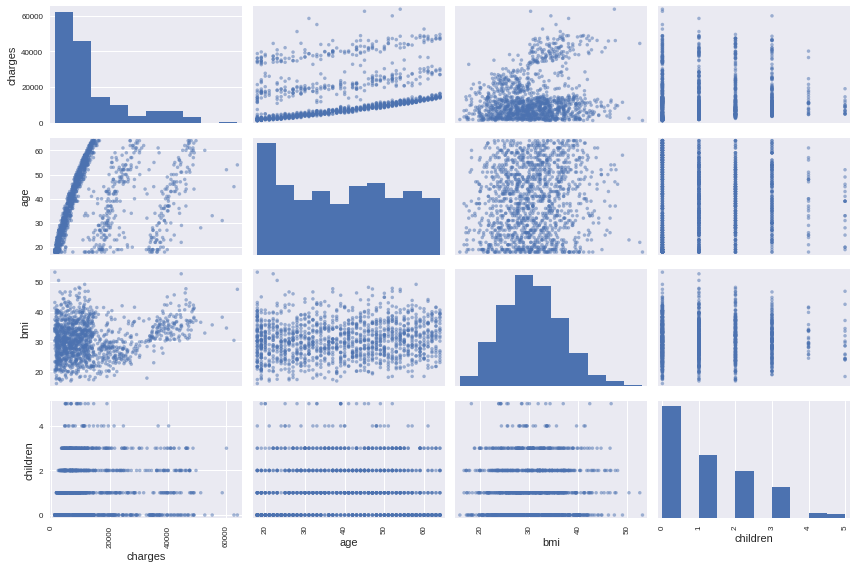

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["charges", "age", "bmi",
              "children"]
scatter_matrix(insurance[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

### It looks like there is a correlation between the age and the amount of charges. The other graphs do not seem to have very strong correlations with each other. There is sort of a correlation with bmi and charges, but it is very weak. The children plots all seem to be completely linear and I can't really draw any conclusions off of those. I think the age to charges correlation is the strongest and most interesting.

In [20]:
strat_train_set.drop("charges", axis=1)
insurance_labels = strat_train_set["charges"].copy()
insurance_labels.head()

294     3906.12700
179     8538.28845
1335    1629.83350
634     9391.34600
67      6389.37785
Name: charges, dtype: float64

In [21]:
sample_incomplete_rows = insurance[insurance.isnull().any(axis=1)].head()
sample_incomplete_rows


,age,sex,bmi,children,smoker,region,charges


In [0]:
from sklearn.pipeline import Pipeline 
from sklearn.base import BaseEstimator, TransformerMixin
from future_encoders import OneHotEncoder

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
    
cat_attribs = ["sex", "region", "smoker"]

pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

In [0]:
prepared_test_insurance = pipeline.fit_transform(test_set)

prepared_train_insurance = pipeline.fit_transform(train_set)

In [30]:
prepared_test_insurance.shape

(268, 8)

In [31]:
prepared_train_insurance.shape

(1070, 8)

In [32]:
prepared_train_insurance[:10]

array([[1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1.]])

In [0]:
prepared_test_insurance[:10]

array([[0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0.]])

In [0]:
from sklearn.linear_model import LinearRegression 

import numpy as np

lin_reg = LinearRegression()

lin_reg.fit(prepared_train_insurance, insurance_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error

insurance_predictions = lin_reg.predict(prepared_train_insurance)

lin_mse = mean_squared_error(insurance_labels, insurance_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7529.3419744768735

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(prepared_train_insurance, insurance_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [0]:
insurance_predictions = tree_reg.predict(prepared_train_insurance)
tree_mse = mean_squared_error(insurance_labels, insurance_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7420.367275733365

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(prepared_train_insurance, insurance_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
insurance_predictions = forest_reg.predict(prepared_train_insurance)
forest_mse = mean_squared_error(insurance_labels, insurance_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

7429.372530311059

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, prepared_train_insurance, insurance_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [7533.34638236 7893.6228571  7904.42152773 7409.28834274 6495.11851278
 7898.07682209 7992.61376756 7343.80739881 7811.81331779 7718.801773  ]
Mean: 7600.091070194523
Standard deviation: 425.2143296838255


In [0]:
lin_scores = cross_val_score(lin_reg, prepared_train_insurance, insurance_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [7611.73933263 8027.94222855 8045.75494906 7294.96149112 6472.47559434
 7807.67585764 7738.53857402 7142.54247158 7930.83836916 7582.70640046]
Mean: 7565.517526856582
Standard deviation: 459.9762916689317


In [0]:
forest_scores = cross_val_score(forest_reg, prepared_train_insurance, insurance_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [7526.62316302 7861.28317697 7891.4741113  7415.9209432  6500.99464062
 7921.41673854 8049.22668705 7408.98688592 7815.11281185 7752.48726447]
Mean: 7614.352642294776
Standard deviation: 425.3672937105223


In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

param_linear = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

forest_reg = RandomForestRegressor(random_state=42)
tree_reg = DecisionTreeRegressor(random_state=42)
linear_reg = LinearRegression()

grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_forest.fit(prepared_train_insurance, insurance_labels)

grid_search_tree = GridSearchCV(tree_reg, parameter_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_tree.fit(prepared_train_insurance, insurance_labels)

grid_search_linear = GridSearchCV(linear_reg, param_linear, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_linear.fit(prepared_train_insurance, insurance_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
grid_search_forest.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [0]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [0]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7641.6588948098215 {'max_features': 2, 'n_estimators': 3}
7614.217119585283 {'max_features': 2, 'n_estimators': 10}
7614.758920622253 {'max_features': 2, 'n_estimators': 30}
7641.658894809821 {'max_features': 4, 'n_estimators': 3}
7614.217119585283 {'max_features': 4, 'n_estimators': 10}
7614.758920622254 {'max_features': 4, 'n_estimators': 30}
7641.6588948098215 {'max_features': 6, 'n_estimators': 3}
7614.217119585283 {'max_features': 6, 'n_estimators': 10}
7614.758920622253 {'max_features': 6, 'n_estimators': 30}
7641.658894809821 {'max_features': 8, 'n_estimators': 3}
7614.217119585283 {'max_features': 8, 'n_estimators': 10}
7614.758920622253 {'max_features': 8, 'n_estimators': 30}
7601.802085178302 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
7601.802085178301 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
7601.802085178301 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
7601.802085178302 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [0]:
pd.DataFrame(grid_search_forest.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003383,0.000526,0.000465,0.000045,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-5.973463e+07,-5.898822e+07,...,-5.839495e+07,3.897385e+06,17,-5.494375e+07,-5.529151e+07,-5.680392e+07,-5.489367e+07,-5.464555e+07,-5.531568e+07,772129.337468
1,0.007183,0.000425,0.000700,0.000151,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-5.898681e+07,-5.784985e+07,...,-5.797630e+07,3.282622e+06,7,-5.469053e+07,-5.483231e+07,-5.633165e+07,-5.453554e+07,-5.437518e+07,-5.495304e+07,706015.799030
2,0.019018,0.000515,0.001178,0.000006,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-5.948702e+07,-5.755360e+07,...,-5.798455e+07,3.024637e+06,11,-5.448592e+07,-5.463321e+07,-5.614755e+07,-5.446147e+07,-5.432981e+07,-5.481159e+07,674888.858287
3,0.002244,0.000028,0.000328,0.000008,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-5.973463e+07,-5.898822e+07,...,-5.839495e+07,3.897385e+06,15,-5.494375e+07,-5.529151e+07,-5.680392e+07,-5.489367e+07,-5.464555e+07,-5.531568e+07,772129.337468
4,0.007224,0.000675,0.000643,0.000144,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-5.898681e+07,-5.784985e+07,...,-5.797630e+07,3.282622e+06,7,-5.469053e+07,-5.483231e+07,-5.633165e+07,-5.453554e+07,-5.437518e+07,-5.495304e+07,706015.799030
5,0.020278,0.001020,0.001270,0.000104,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-5.948702e+07,-5.755360e+07,...,-5.798455e+07,3.024637e+06,14,-5.448592e+07,-5.463321e+07,-5.614755e+07,-5.446147e+07,-5.432981e+07,-5.481159e+07,674888.858287
6,0.002401,0.000079,0.000353,0.000025,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-5.973463e+07,-5.898822e+07,...,-5.839495e+07,3.897385e+06,17,-5.494375e+07,-5.529151e+07,-5.680392e+07,-5.489367e+07,-5.464555e+07,-5.531568e+07,772129.337468
7,0.006935,0.000136,0.000577,0.000030,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-5.898681e+07,-5.784985e+07,...,-5.797630e+07,3.282622e+06,7,-5.469053e+07,-5.483231e+07,-5.633165e+07,-5.453554e+07,-5.437518e+07,-5.495304e+07,706015.799030
8,0.019881,0.000277,0.001197,0.000014,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-5.948702e+07,-5.755360e+07,...,-5.798455e+07,3.024637e+06,11,-5.448592e+07,-5.463321e+07,-5.614755e+07,-5.446147e+07,-5.432981e+07,-5.481159e+07,674888.858287
9,0.002681,0.000197,0.000395,0.000075,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-5.973463e+07,-5.898822e+07,...,-5.839495e+07,3.897385e+06,16,-5.494375e+07,-5.529151e+07,-5.680392e+07,-5.489367e+07,-5.464555e+07,-5.531568e+07,772129.337468


In [0]:
feature_importances = grid_search_forest.best_estimator_.feature_importances_

attributes = ["age", "sex", "bmi", "children", "region", "smoker", "charges"]
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5735551440143409, 'charges'),
 (0.004594988091049272, 'bmi'),
 (0.004449006518891796, 'region'),
 (0.003372245238718608, 'children'),
 (0.0022308761360913193, 'sex'),
 (0.0021064980883341577, 'age'),
 (0.00163795594862147, 'smoker')]

In [0]:
final_model_forest = grid_search_forest.best_estimator_
final_model_linear = grid_search_linear.best_estimator_
final_model_tree = grid_search_tree.best_estimator_ 

X_test = strat_test_set.drop("charges", axis=1)
y_test = strat_test_set["charges"].copy()

X_test_prepared = pipeline.fit_transform(X_test)

X_test_prepared.shape

(268, 8)

In [0]:
X_test_prepared = pipeline.fit_transform(X_test)

final_predictions_forest = final_model_forest.predict(X_test_prepared)
final_predictions_tree = final_model_tree.predict(X_test_prepared)
final_predictions_linear = final_model_linear.predict(X_test_prepared)

final_mse_forest = mean_squared_error(y_test, final_predictions_forest)
final_rmse_forest = np.sqrt(final_mse_forest)

final_mse_tree = mean_squared_error(y_test, final_predictions_tree)
final_rmse_tree = np.sqrt(final_mse_tree)

final_mse_linear = mean_squared_error(y_test, final_predictions_linear)
final_rmse_linear = np.sqrt(final_mse_linear)


In [0]:
final_rmse_linear

7179.731583668419

In [0]:
final_rmse_forest

7151.997877653488

In [0]:
final_rmse_tree

7149.102081174943

### It seems as if there was no clear winner among the three different regressions. The decision tree model seemed to have the best score, going off of rmse, but only by a few points. It was really interesting to see that all of the three models performed similarly on the test set, and had similar differences in scores between the final rmse and their standard deviation during training. I also thought that it was interesting that the most important feature was "bmi", while "age" seemed to be more correlated when running the correlation matrix analysis at the beginning. I think it makes sense that these three models were fairly similar given that the number of features was few and the data was not as complicated as previous examples shown in class. Overall I think that it is difficult to see which model would be best for further use or analysis as all scored very similarly.